# Deep Q-Network (DQN)
---
This notebook implements a DQN agent with OpenAI Gym's Racing-Car-v2 environment.

**Author:** Omar Rodrigo Muñoz Gómez

**Description:** Deep Reinforcement Learning Project for Udacity Nanodegree.

### 1. Import the Necessary Packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym
import random
import torch
import numpy as np
import cv2
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [20]:
env = gym.make('CarRacing-v2', continuous=False, render_mode='human')

print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (96, 96, 3)
Number of actions:  5


In [4]:
from dqn_agent import Agent

agent = Agent(state_channels=1, state_height=96, state_width=96, action_size=5, seed=0)

### 3. Train the Agent with DQN

Episode 100	Average Score: -103.22
Episode 200	Average Score: -114.77
Episode 300	Average Score: -87.796
Episode 400	Average Score: -48.87
Episode 500	Average Score: 104.07
Episode 600	Average Score: 468.97
Episode 700	Average Score: 592.98
Episode 800	Average Score: 722.52
Episode 900	Average Score: 720.91
Episode 1000	Average Score: 767.16
Episode 1100	Average Score: 745.26
Episode 1177	Average Score: 782.12
Environment solved in 1077 episodes!	Average Score: 782.12


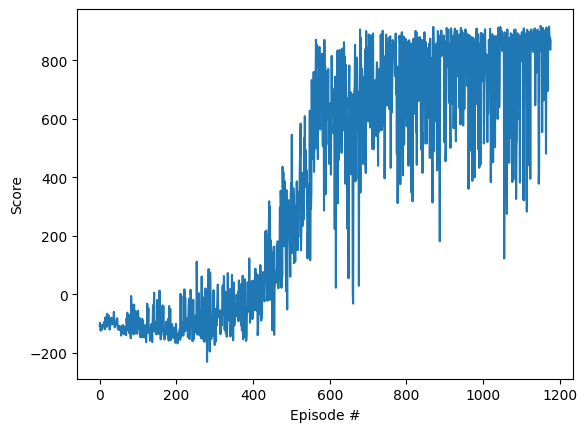

In [9]:
def dqn(n_episodes=2000, max_t=100000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state, info = env.reset(options={})
        # pdb.set_trace()
        # state = preprocess_image(state)
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, terminated, truncated, _ = env.step(action)

            is_out_of_track = reward < -50
            
            if score < 0 and not is_out_of_track:
                reward = reward * 2
                
            agent.step(state, action, reward, next_state, terminated)
            state = next_state
            score += reward
            if terminated or truncated:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=780.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'trained_agent.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Plot the rolling mean of the scores

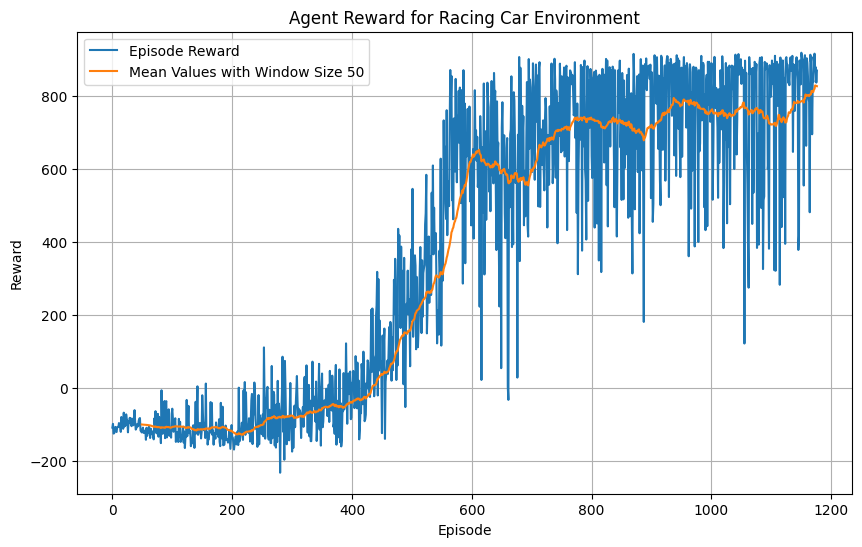

In [15]:
# Define window size
window_size = 50

# Calculate mean values using a rolling window
mean_values = np.convolve(scores, np.ones(window_size)/window_size, mode='valid')
vector_length = len(scores)


# Plot original vector and mean values
plt.figure(figsize=(10, 6))
plt.plot(scores, label='Episode Reward')
plt.plot(np.arange(window_size-1, vector_length), mean_values, label='Mean Values with Window Size 50')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Agent Reward for Racing Car Environment')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
env.close()

In [23]:
import pickle

# Save variable to file
with open('scores.pkl', 'wb') as f:
    pickle.dump(scores, f)